### Identifying the missing value in data

In [1]:
import pandas as pd
import numpy as np
from io import StringIO

In [2]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''


In [3]:
df = pd.read_csv(StringIO(csv_data))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Checking for missing values

In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### Eliminating features havingmissing values

In [6]:
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


### Dropping rows with all values nan

In [8]:
df.dropna(how ='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Drop rows that have fewer than 4 real values

In [9]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


### Dropping rows where nan comes in a specific column

In [10]:
df.dropna(subset =['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Replacing NaN by mean value

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [12]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### Handling categorical data

In [13]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class2'],
['red', 'L', 13.5, 'class1'],
['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

In [14]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Mapping ordinal feature

In [15]:
size_mapping = {'XL': 3,
'L': 2,
'M': 1}

In [16]:
df['size'] = df['size'].map(size_mapping)

In [17]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### Inversing the mapped size

In [18]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [19]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [20]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### Encoding class label

In [21]:
class_mapping = {label :idx for idx, label in
                enumerate(np.unique(df['classlabel']))}

In [22]:
class_mapping

{'class1': 0, 'class2': 1}

In [23]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [24]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [25]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


### Reversing the class mapping

In [26]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [27]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### Using scikit learn library 

In [28]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [29]:
y

array([1, 0, 1])

In [30]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [31]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

### Performing one hot encoding on nominal features

In [32]:
X = df[['color', 'price','size']].values
color_le = LabelEncoder()
X[: , 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 10.1, 1],
       [2, 13.5, 2],
       [0, 15.3, 3]], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color','price','size']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [34]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
('onehot', OneHotEncoder(), [0]),
('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

### Using get dummies function

In [35]:
pd.get_dummies(df[['price','color','size']], drop_first = True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [36]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
('onehot', color_ohe, [0]),
('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Partitioning a dataset into training and test set

In [37]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None)

In [38]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [39]:
df_wine.columns = ['Class label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']

In [40]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
print('Claa label', np.unique(df_wine['Class label']))

Claa label [1 2 3]


### Dividing the dataset into training and test set

In [43]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[: , 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3,random_state = 0, stratify = y)

### Bringing feature on the same scale

In [44]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Selecting meaningful features

In [45]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1', solver = 'liblinear', multi_class = 'ovr')
lr = LogisticRegression(penalty = 'l1', C =1.0, solver = 'liblinear', multi_class = 'ovr')
# C = 1.0 is default. We can increase or decrease to make regularization effect stronger or weaker
lr.fit(X_train_std, y_train)
print ('Training Accuracy:' , lr.score(X_train_std, y_train))
print('Test Accuracy:', lr.score(X_test_std, y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


In [46]:
lr.intercept_

array([-1.26365539, -1.21587351, -2.37144962])

In [47]:
lr.coef_

array([[ 1.2460245 ,  0.18062073,  0.74527226, -1.16294567,  0.        ,
         0.        ,  1.16379737,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55315499,  2.5094595 ],
       [-1.53819056, -0.38633698, -0.9951786 ,  0.36384775, -0.05913756,
         0.        ,  0.66727439,  0.        ,  0.        , -1.93282881,
         1.23642931,  0.        , -2.23307061],
       [ 0.13532406,  0.16958945,  0.35746745,  0.        ,  0.        ,
         0.        , -2.43312805,  0.        ,  0.        ,  1.5617817 ,
        -0.8177441 , -0.49788618,  0.        ]])

### We have trained a model that is robust to potentially irrelevant features in this dataset.
### The weight vectors are not sparse because they consist of more non zero than zero entries.
### We can introduce sparsity by forther increasing regularization strength i.e chosing lower value of C.

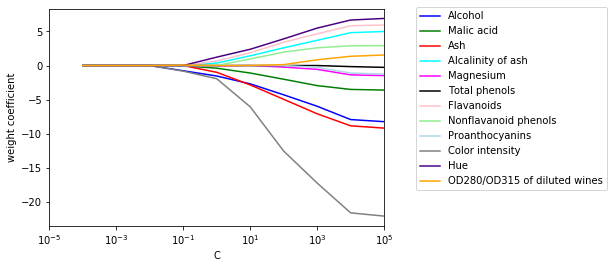

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green','red','cyan','magenta','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights, params = [], []
for c in np.arange(-4. , 6.):
    lr = LogisticRegression(penalty = 'l1', C = 10.**c, solver = 'liblinear', multi_class = 'ovr', random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],label = df_wine.columns[column +1], color = color)
plt.xlim([10**(-5), 10 ** 5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()

### All features weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01), C is inverse of regularization parameter lambda

### Sequential feature selection Algorithm

In [66]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                                random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                             X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                     X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        

In [67]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

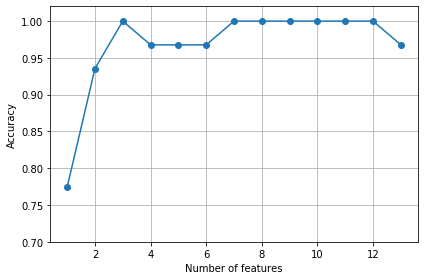

In [68]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

### Classifier achieved 100 percent accuracy for k={3, 7, 8, 9, 10, 11, 12}

In [69]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


### let's evaluate the performance of the KNN classifier on the original test dataset


In [71]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


### let's use the selected three-feature subset and see how well KNN performs

In [72]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:',knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:',knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


### When using less than a quarter of the original features in the Wine dataset, the prediction accuracy on the test dataset declined slightly. This may indicate that those three features do not provide less discriminatory information than the original dataset. However, we also have to keep in mind that the Wine dataset is a small dataset and is very susceptible to randomness

### Assessing feature importance with random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


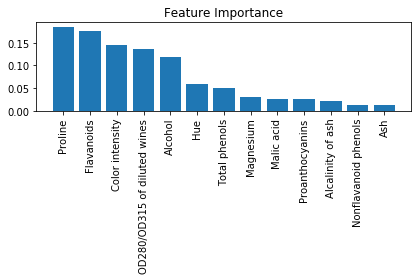

In [81]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the 500 decision trees

In [83]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold','criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
feat_labels[indices[f]],
importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
